<a href="https://colab.research.google.com/github/vijay-py-code/My-project/blob/master/Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Relevane reference at the end. 

Educational Content

In [ ]:
!pip install mpl_finance

In [ ]:
import pandas as pd
import numpy as np
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [ ]:
from google.colab import files
data_to_load = files.upload()

In [ ]:
import io


In [ ]:
# df = pd.read_csv(r"C:\Users\pvarshney\Downloads\BlackField Research\Content\Nifty 50 Data\ITC.csv") # if running on local. 
df = pd.read_csv(io.BytesIO(data_to_load['ITC.csv'])) # if running on google colab
df = df.drop(['Unnamed: 0'], axis = 1)
df
start_date = "2021-01-01"
end_date = "2021-06-31"
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

df


,Date,Open,High,Low,Close
1730,2021-01-01,209.90,214.20,209.30,213.85
1731,2021-01-04,214.00,216.00,212.10,213.40
1732,2021-01-05,212.45,213.25,210.60,211.45
1733,2021-01-06,211.45,211.50,204.50,205.40
1734,2021-01-07,206.10,207.60,202.10,202.80
...,...,...,...,...,...
1847,2021-06-24,204.45,204.65,202.55,203.25
1848,2021-06-25,204.00,205.60,203.75,205.05
1849,2021-06-28,205.90,205.90,203.35,203.60
1850,2021-06-29,203.60,205.30,203.15,203.30


In [ ]:
df.set_index('Date', inplace=True)

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [ ]:
def plot_chart():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red')

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    fig.show()

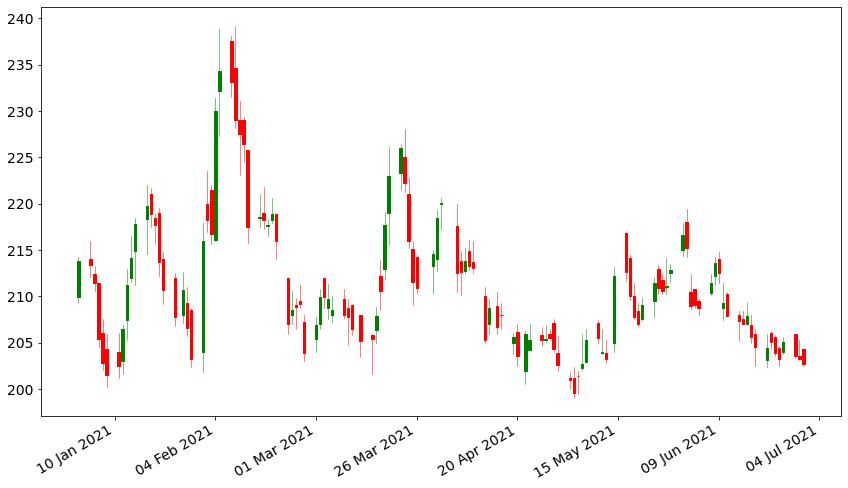

In [ ]:
plot_chart()

In [ ]:
def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
    and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
    and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

    return resistance

In [ ]:
levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        levels.append((i,df['Low'][i]))
    elif isResistance(df,i):
        levels.append((i,df['High'][i]))

In [ ]:
def plot_all():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red')

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    for level in levels:
        plt.hlines(level[1],xmin=df['Date'][level[0]],\
                   xmax=max(df['Date']),colors='blue')
        fig.show()

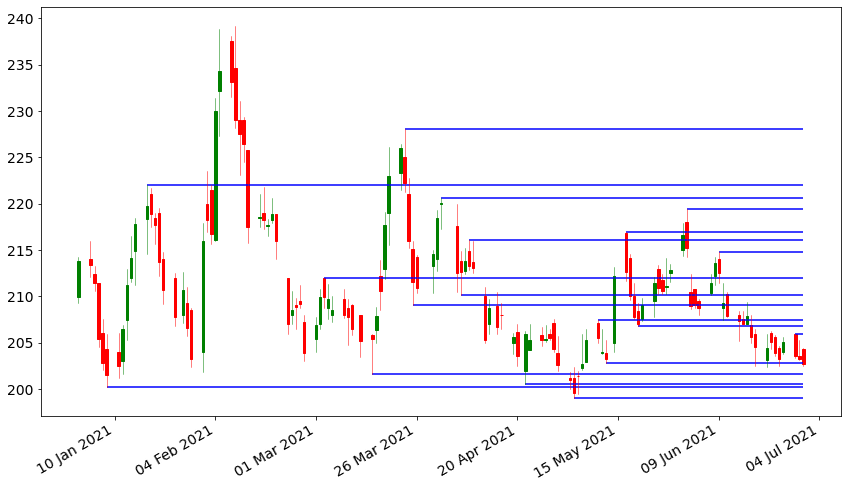

In [ ]:
plot_all()


In [ ]:
# this is twice the average size of a candle

s =  2 * np.mean(df['High'] - df['Low'])

In [ ]:
def isFarFromLevel(l):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

In [ ]:
levels = []
for i in range(2,df.shape[0]-2):
    if isSupport(df,i):
        l = df['Low'][i]

        if isFarFromLevel(l):
            levels.append((i,l))

    elif isResistance(df,i):
        l = df['High'][i]

        if isFarFromLevel(l):
            levels.append((i,l))

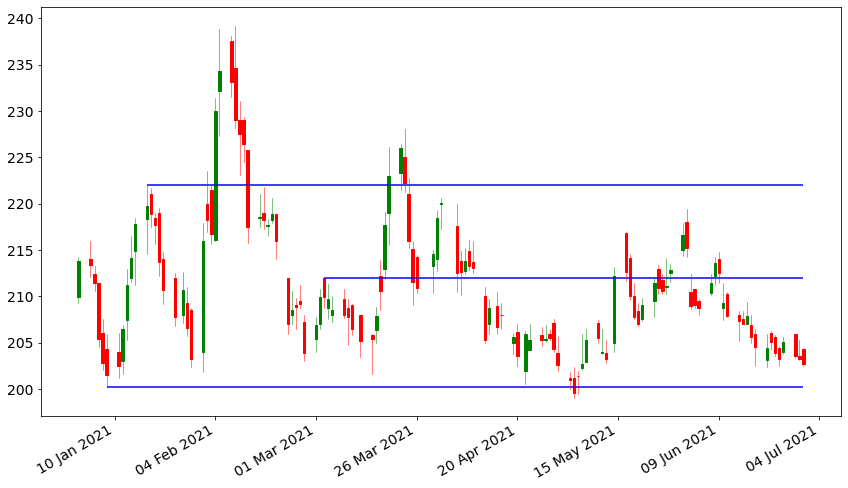

In [ ]:
plot_all()


References:
1. https://towardsdatascience.com/detection-of-price-support-and-resistance-levels-in-python-baedc44c34c9
